# Instalação da biblioteca

In [2]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [29]:
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import matplotlib as mpl
import pandas as pd

# Donwload das rede viárias dos bairros vizinhos a UFRN
Para uma melhor análise, peguei a rede da UFRN mais uma rede em um raio de 3km de distância do o endereço dado, no nosso caso, a Universidade.

/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


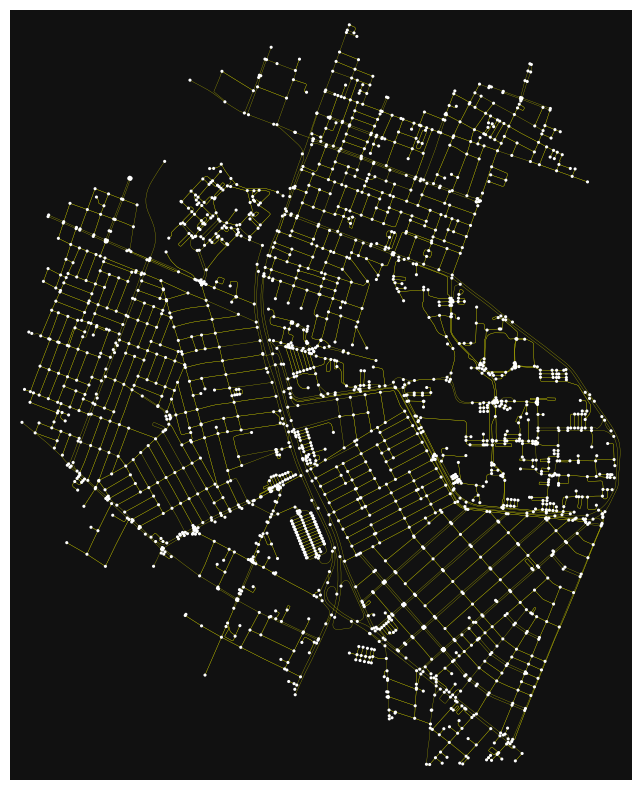

In [8]:
# Baixar a rede viária para bike da UFRN incluindo nós dentro de 3 km ao longo da rede a partir do endereço
G = ox.graph_from_address(
    address="Universidade Federal do Rio Grando do Norte, Natal, RN",
    dist=3000,
    dist_type="network",
    network_type="bike",
)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=5, edge_color="y", edge_linewidth=0.2)

# Requisito 1

## Centralidade de Grau

A centralidade de grau (ou degree centrality) é uma métrica de análise de redes que **mede o número de conexões diretas (arestas) que cada nó possui**. Em um grafo que representa uma rede viária, como o da imagem, cada nó representa uma interseção (cruzamento de ruas) e cada aresta representa uma rua que conecta duas interseções.

No caso da rede escolhida, **os nós em roxo** indicam uma centralidade de grau menor (menos conexões ou menor importância na rede viária). Enquanto, **os nós em amarelo** possuem maior centralidade de grau, indicando pontos de maior conexão e, possivelmente, áreas mais movimentadas ou interseções centrais.

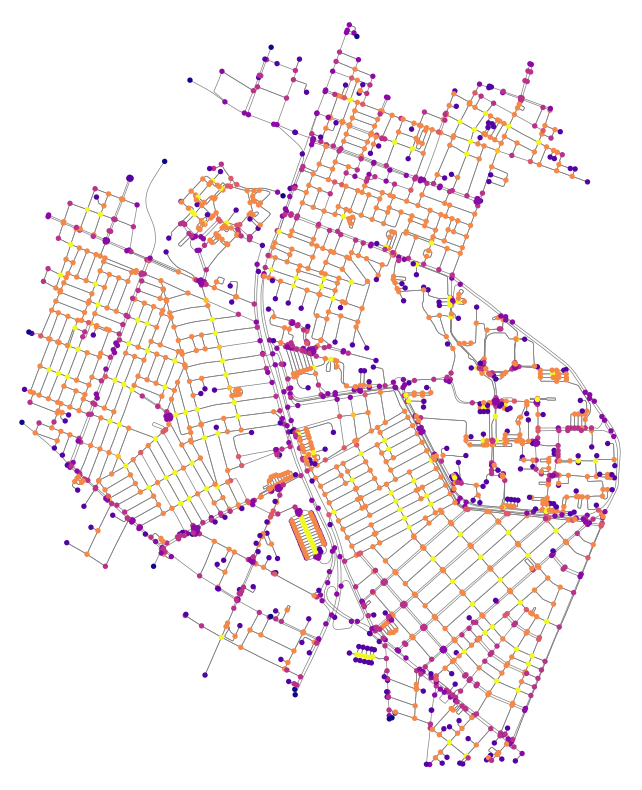

In [9]:
# Calcular a centralidade de grau (degree centrality)
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')

# Criar uma paleta de cores para visualizar a centralidade de grau
cmap = cm.plasma  # Escolha a paleta desejada
norm = colors.Normalize(vmin=min(degree_centrality.values()), vmax=max(degree_centrality.values()))
node_colors = [cmap(norm(degree_centrality[node])) for node in G.nodes()]

# Visualizar o grafo com a centralidade de grau
fig, ax = ox.plot_graph(
    G,
    node_size=15,
    node_color=node_colors,
    edge_linewidth=0.5,
    edge_color='gray',
    bgcolor='white',
    figsize=(10, 10)
)

plt.show()

## Centralidade de Proximidade

A centralidade de proximidade (ou closeness centrality) é uma medida que **indica o quão próximo um nó está de todos os outros nós na rede.** Em outras palavras, ela avalia a acessibilidade de um nó, considerando a soma das menores distâncias entre ele e todos os outros nós. Ele ajuda a identificar quais interseções (nós) estão mais “próximas” de todas as outras em termos de distância geodésica, **ou seja, menor número de ruas necessárias para chegar a qualquer outro ponto da rede.**

Na rede vistas os nós em tons mais claros **(amarelos)** têm uma centralidade de proximidade mais alta, o que significa que são interseções com acessibilidade vantajosa, possivelmente no centro do bairro ou em pontos de convergência de várias ruas. Esses nós estão em uma posição central dentro da rede e podem ser alcançados mais rapidamente a partir de qualquer outro nó. Diferente dos nós em tons mais escuros **(roxo/preto)**, ou seja, estes nós têm centralidade de proximidade mais baixa, o que indica que estão em regiões menos conectadas ou na periferia da área analisada. Eles provavelmente precisam de mais etapas (ou ruas) para acessar a maioria dos outros pontos da rede.

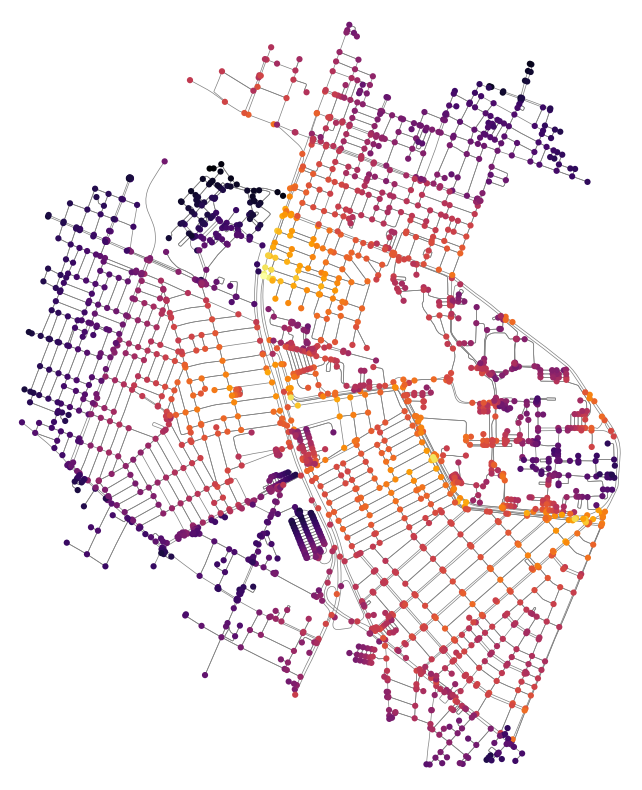

In [10]:
# Calcular a centralidade de proximidade
closeness_centrality = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')

# Criar uma paleta de cores
cmap = cm.inferno # Escolha a paleta de cores desejada
norm = colors.Normalize(vmin=min(closeness_centrality.values()), vmax=max(closeness_centrality.values()))

# Mapear os valores de centralidade para cores
node_colors = [cmap(norm(closeness_centrality[node])) for node in G.nodes()]

# Visualização do mapa
fig, ax = ox.plot_graph(G,
                       node_size=20,  # Ajuste o tamanho dos nós
                       node_color=node_colors,
                       edge_linewidth=0.5,  # Ajuste a espessura das arestas
                       edge_color='gray',
                       bgcolor='white',  # Cor de fundo branca
                       figsize=(10, 10))
plt.show()

## Centralidade de Intermediação

A centralidade de intermediação (ou betweenness centrality) é uma métrica que **mede a frequência com que um nó atua como um ponto de passagem em caminhos mínimos entre outros nós da rede.** Em termos simples, ela indica a importância de um nó como uma “ponte” ou um ponto crítico para o fluxo de informação ou movimento dentro do grafo.

**Nós em tons mais claros (amarelos e verdes)** têm uma alta centralidade de intermediação, significando que eles atuam como pontos de passagem chave na rede. Já os **nós em tons mais escuros (roxos)** têm baixa centralidade de intermediação, o que indica que são menos importantes para a conectividade geral da rede. Eles estão frequentemente localizados nas periferias ou em ruas que não servem como rotas principais de tráfego.


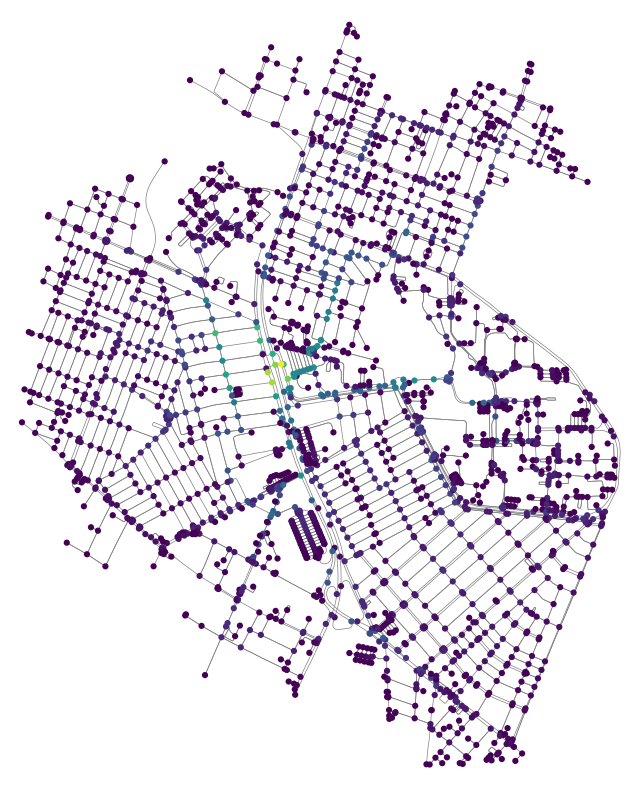

<Figure size 640x480 with 0 Axes>

In [ ]:
# Calcular a centralidade de intermediação (betweenness centrality)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, weight='length')
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')

# Criar uma paleta de cores para visualizar a centralidade de intermediação
cmap = cm.viridis  # Escolha a paleta desejada
norm = colors.Normalize(vmin=min(betweenness_centrality.values()), vmax=max(betweenness_centrality.values()))
node_colors = [cmap(norm(betweenness_centrality[node])) for node in G.nodes()]

# Visualizar o grafo com a centralidade de intermediação
fig, ax = ox.plot_graph(
    G,
    node_size=20,
    node_color=node_colors,
    edge_linewidth=0.5,
    edge_color='gray',
    bgcolor='white',
    figsize=(10, 10)
)
plt.show()

## Centralidade de Autovetor

A centralidade de autovetor mede a importância de um nó na rede não apenas pela quantidade de conexões que ele possui, mas também pela importância dos nós aos quais ele está conectado. Ou seja,**um nó conectado a outros nós altamente conectados terá uma alta centralidade de autovetor**. Isso cria um efeito de "prestígio" ou "influência", onde os nós que estão próximos de outros nós centrais se tornam mais importantes.

No grafo da rede **os nós com tons mais claros (como amarelo ou verde claro)** representam locais com alta centralidade de autovetor. Esses pontos são importantes para a estrutura da rede, pois estão conectados a outros nós influentes e com grande fluxo. Diferente dos **nós em tons mais escuros (como roxo)**.

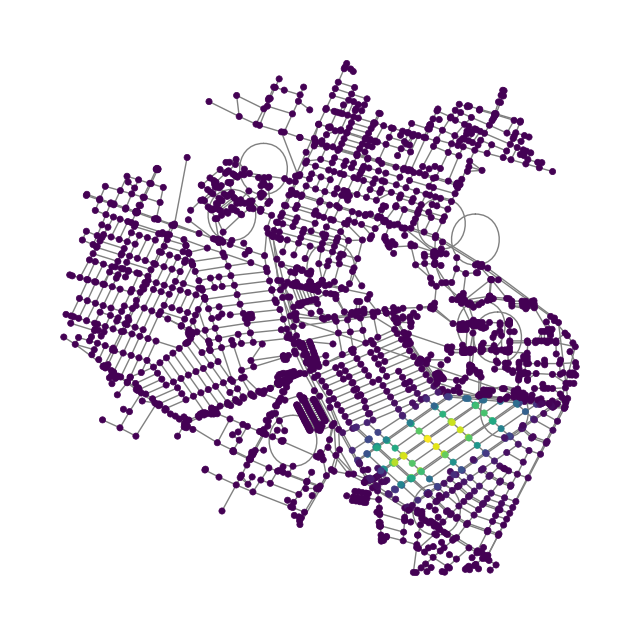

In [12]:
# Converter o grafo para um grafo simples (sem arestas múltiplas)
G_simple = nx.Graph(G)

# Calcular a centralidade de autovetor com mais iterações e vetor inicial
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_simple, max_iter=500, tol=1e-06)
except nx.PowerIterationFailedConvergence:
    print("Centralidade de autovetor não convergiu.")

# Verificar se a centralidade de autovetor foi calculada e adicionar como atributo
if 'eigenvector_centrality' in locals():
    nx.set_node_attributes(G_simple, eigenvector_centrality, 'eigenvector')

# Criar uma paleta de cores para visualizar a centralidade de autovetor
cmap = cm.viridis  # Escolha a paleta desejada
norm = colors.Normalize(vmin=min(eigenvector_centrality.values()), vmax=max(eigenvector_centrality.values()))
node_colors = [cmap(norm(eigenvector_centrality[node])) for node in G_simple.nodes()]

# Visualizar o grafo com a centralidade de autovetor
fig, ax = plt.subplots(figsize=(8, 8))
pos = {node: (data['x'], data['y']) for node, data in G_simple.nodes(data=True)}

# Desenhar os nós e arestas
nx.draw(
    G_simple,
    pos,
    ax=ax,
    node_size=20,
    node_color=node_colors,
    edge_color='gray',
    linewidths=0.5,
)
# Exibir o gráfico
plt.show()

# Requisito 2


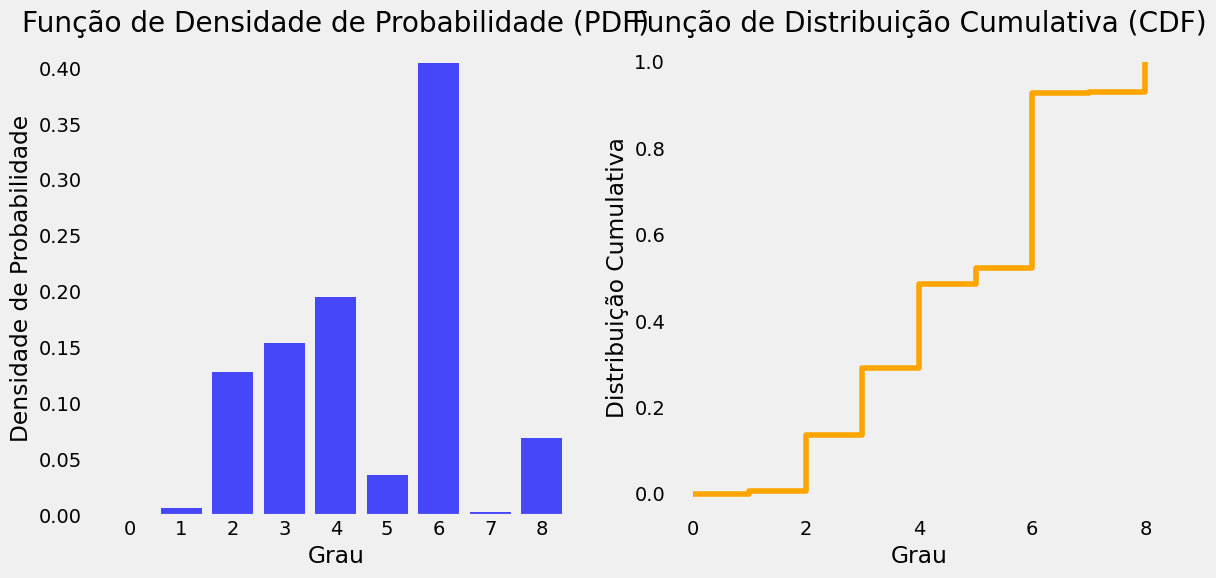

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Calcular os graus dos nós
degree_sequence = [G.degree(node) for node in G.nodes()]
degree_counts = np.bincount(degree_sequence)  # Contagem dos graus

# 2. Calcular a PDF
degree_values = np.arange(len(degree_counts))
pdf = degree_counts / sum(degree_counts)  # Normalizando para obter PDF

# 3. Calcular a CDF
cdf = np.cumsum(pdf)  # CDF é a soma cumulativa da PDF

# 4. Visualizar a PDF e a CDF
plt.figure(figsize=(12, 6))

# Gráfico da PDF
plt.subplot(1, 2, 1)
plt.bar(degree_values, pdf, color='blue', alpha=0.7, label='PDF')
plt.title('Função de Densidade de Probabilidade (PDF)')
plt.xlabel('Grau')
plt.ylabel('Densidade de Probabilidade')
plt.xticks(degree_values)
plt.grid()

# Gráfico da CDF
plt.subplot(1, 2, 2)
plt.step(degree_values, cdf, where='post', color='orange', label='CDF')
plt.title('Função de Distribuição Cumulativa (CDF)')
plt.xlabel('Grau')
plt.ylabel('Distribuição Cumulativa')
plt.grid()

plt.tight_layout()
plt.show()


## Curva de Densidade de Probabilidade (PDF)

Representa uma estimativa da distribuição contínua dos graus. Ajuda a entender a frequência relativa dos graus em relação a toda a rede, indicando quais graus são mais comuns.

*   O grau mais frequente na rede é em torno de 6, indicando que a maioria dos nós tende a ter aproximadamente 6 conexões.

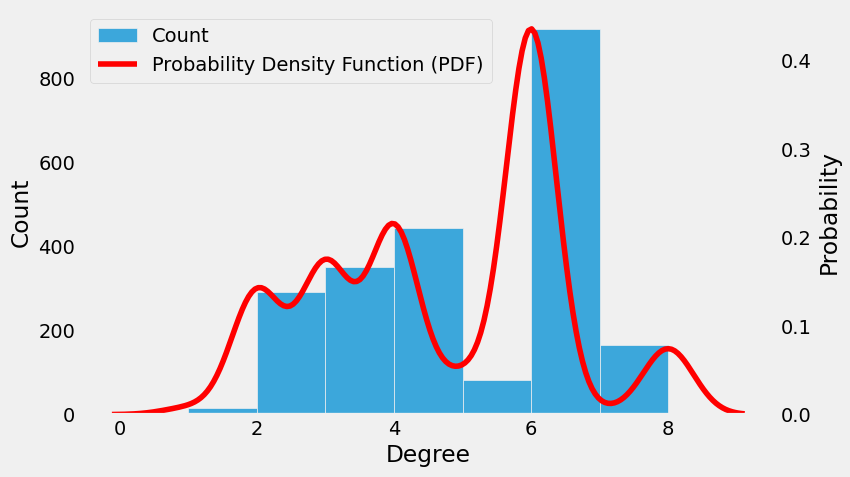

In [19]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(8,5))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

## Função de Densidade Cumulativa (CDF)
A CDF pode ser muito útil para analisar a conectividade da rede. Ao observar como a CDF se comporta, você pode inferir se a maioria dos nós tem um número baixo de conexões ou se há muitos nós altamente conectados.

* A curva da CDF se estabiliza perto de 1 (ou 100%) após o grau 8, o que sugere que poucos nós têm graus superiores a este valor.

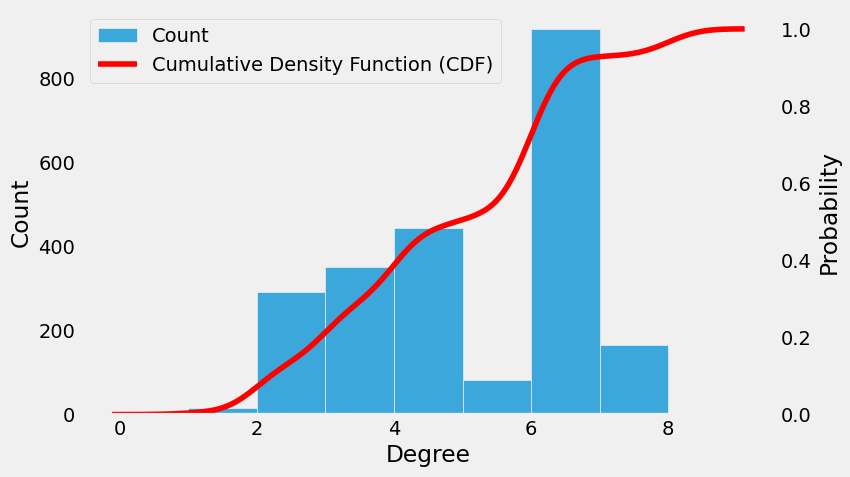

In [20]:
plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(8,5))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

# Requisito 3

## Analisando a Matriz de Correlação das Métricas de Centralidade

* A diagonal principal mostra a distribuição de cada métrica individualmente. A forma da distribuição (normal, bimodal, etc.) pode indicar características particulares da rede. Por exemplo, uma distribuição de grau com uma cauda longa sugere a presença de poucos nós com muitas conexões.

* A sobreposição das distribuições pode indicar que algumas métricas estão capturando informações semelhantes. Por exemplo, se a distribuição de degree e betweenness forem altamente sobrepostas, isso pode indicar que os nós com alto degree também tendem a ter alto betweenness.


Correlações: Os valores fora da diagonal principal representam as correlações entre pares de métricas. Um valor próximo de 1 indica uma correlação positiva forte, ou seja, quando uma métrica aumenta, a outra também tende a aumentar. Um valor próximo de -1 indica uma correlação negativa forte, ou seja, quando uma métrica aumenta, a outra tende a diminuir. Um valor próximo de 0 indica que não há correlação entre as métricas.

Interpretação das Correlações:

* Degree e Betweenness: **Uma correlação positiva forte indica que os nós com mais conexões (alto degree) tendem a estar nos caminhos mais curtos entre outros nós (alto betweenness).** Isso é esperado, pois nós com muitas conexões geralmente estão bem posicionados para conectar diferentes partes da rede.

* Closeness e Betweenness: **Uma correlação positiva moderada indica que os nós que estão próximos de todos os outros (alto closeness) também tendem a estar nos caminhos mais curtos entre outros nós (alto betweenness).** Isso também é esperado, pois nós centrais tendem a ter alta closeness e betweenness.


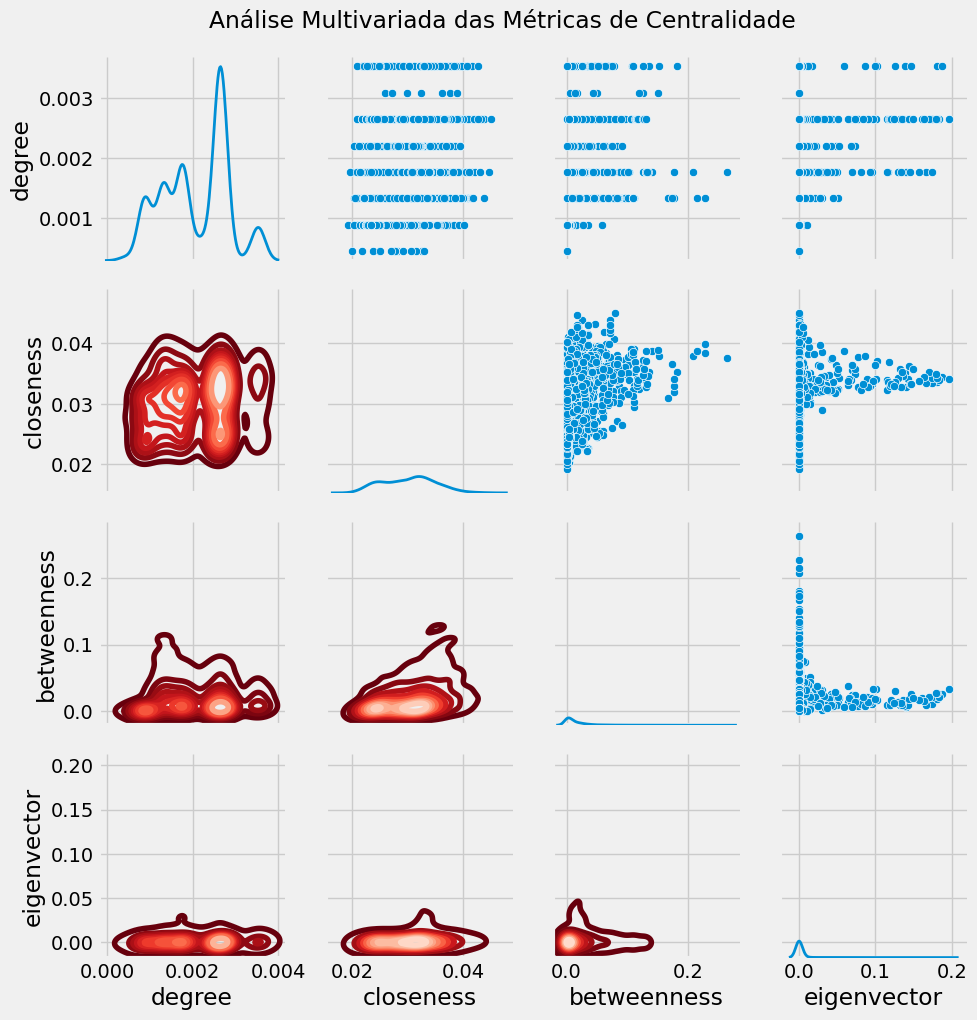

In [ ]:
# 1. Criar um DataFrame com as métricas de centralidade
centrality_data = {
    'degree': [degree_centrality[node] for node in G_simple.nodes()],
    'closeness': [closeness_centrality[node] for node in G_simple.nodes()],
    'betweenness': [betweenness_centrality[node] for node in G_simple.nodes()],
}

if 'eigenvector_centrality' in locals():
    centrality_data['eigenvector'] = [eigenvector_centrality[node] for node in G_simple.nodes()]

# Criar o DataFrame
df = pd.DataFrame(centrality_data)

# 2. Análise multivariada com PairGrid
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)  # Plota scatterplot na parte superior
fig.map_lower(sns.kdeplot, cmap="Reds_r")  # Plota KDE na parte inferior
fig.map_diag(sns.kdeplot, lw=2, legend=False)  # Plota KDE na diagonal

plt.suptitle("Análise Multivariada das Métricas de Centralidade", y=1.02)  # Título da figura
plt.show()

# Requisito 4



## Quem é o core/shell da rede?

O conceito de core/shell se refere à estrutura da rede, onde os nós no core são aqueles que têm uma alta conectividade (ou centralidade), enquanto os nós no shell são aqueles que têm uma conectividade mais baixa.

* Os nós do core (vermelhos) são os mais conectados na rede. **Eles têm um alto número de conexões (grau)** e desempenham um papel crucial na estrutura da rede. Em um contexto de mobilidade, isso significa que esses locais são mais acessíveis e podem servir como pontos de partida ou chegada importantes para um sistema de compartilhamento de bicicletas. Colocar dock-stations nesses pontos pode maximizar a utilização do sistema.
Shell:

* Os nós do shell (azul) **têm uma conectividade mais baixa** e estão nas bordas da rede. Eles podem representar áreas que têm menos acesso a rotas principais ou que não são frequentemente usadas. Embora possam não ser pontos de acesso principais, ainda são importantes para a conectividade da rede, pois ajudam a conectar áreas menos centrais. A inclusão de dock-stations em alguns desses locais pode incentivar o uso de bicicletas em áreas menos exploradas.

Nós do Core (grau > 6.44): [501286371, 501006398, 506036618, 6376363667, 501006547, 6345285755, 11007692416, 501834757, 501118379, 6345285751, 501152617, 501271794, 702325638, 501791803, 503755744, 501791817, 505084231, 2115015949, 503755662, 503755597, 585798880, 501834691, 501834719, 501834699, 501834695, 501834704, 501834708, 501834736, 501834789, 501834715, 6370922829, 505404840, 501834775, 501834769, 505404993, 505404666, 501838274, 501838281, 501838283, 505404757, 501838339, 501838338, 505404754, 501841236, 501841254, 1413988436, 501841261, 2718089771, 526587328, 502418931, 503314510, 502752731, 503731441, 503732237, 503732238, 503732249, 505489662, 4753154483, 4753154484, 505490347, 503755471, 503755395, 503755659, 503755408, 503755821, 505492177, 503755666, 503755467, 503755581, 503755565, 503755576, 505491621, 505492156, 505492488, 505492117, 505095737, 2718229209, 505095706, 6376363713, 526588741, 526588745, 504792517, 504792519, 504801632, 526589265, 505084219, 505086618, 50

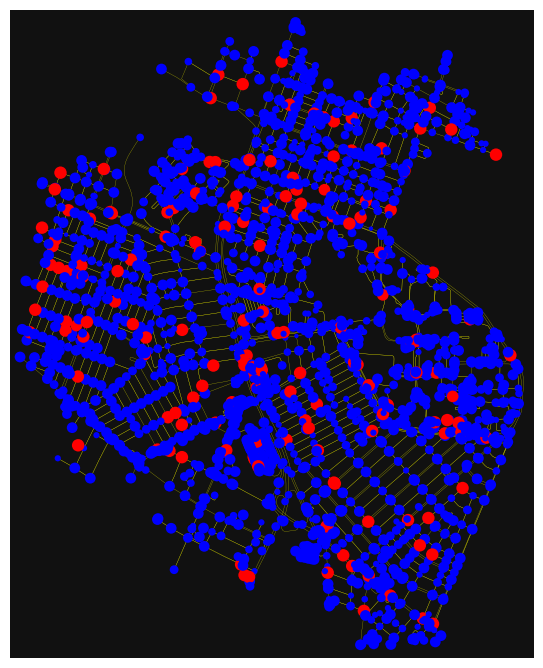

In [28]:
# Converter a rede de OSMnx para um grafo de NetworkX
H = ox.project_graph(G)

# Calcular a centralidade dos graus dos nós
degree_centrality = np.array(list(dict(H.degree()).values()))
mean_degree = np.mean(degree_centrality)
std_degree = np.std(degree_centrality)

# Definir limites para o core e shell
core_threshold = mean_degree + std_degree  # Limite superior para o core
shell_threshold = mean_degree - std_degree  # Limite inferior para o shell

# Identificar nós do core e do shell
core_nodes = [n for n, d in H.degree() if d > core_threshold]
shell_nodes = [n for n, d in H.degree() if d < shell_threshold]

# Imprimir resultados
print(f"Nós do Core (grau > {core_threshold:.2f}): {core_nodes}")
print(f"Nós do Shell (grau < {shell_threshold:.2f}): {shell_nodes}")

# Visualização da rede com o core e shell
import matplotlib.pyplot as plt

# Definir tamanhos de nós
node_color = ['r' if n in core_nodes else 'b' for n in H.nodes()]
# Definir tamanhos de nós com um fator de escala menor
node_size = [degree_centrality[i] * 10 for i in range(len(H.nodes()))]  # Alterado para 20

# Visualização da rede com o core e shell
fig, ax = ox.plot_graph(G, node_color=node_color, node_size=node_size, edge_color='y', edge_linewidth=0.2)